## **Exploratory Data Analysis and Model Building - Bank Marketing Campaign**

**Data Description**

**What is a Term Deposit?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read CSV and create DataFrame
df_train = pd.read_csv('bank-train.csv', sep=";").drop("id", axis=1)
df_test = pd.read_csv('bank-test.csv', sep=";")

In [11]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
# Check data structure
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.2+ MB


In [13]:
# Describe data number of rows and columns
df_train.shape

(40000, 17)

In [14]:
# Describe numerical columns
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550,0.072400
std,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128,0.259152
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000,1.000000


In [15]:
for col in df_train.select_dtypes(include="object").columns:
    print(col)
    print(df_train[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
poutcome
['unknown' 'failure' 'other' 'success']


**Data Description**

**Feature**

**Label**

## **Exploratory Data Analysis**

**EDA TO-DO List:**
- Find Unwanted Columns
- Find Missing Values
- Find Features with One Value
- Explore Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete Numerical Features and Label
- Find Continuous Numerical Features
- Distribution of Continuous Numerical Features
- Relation between Continuous Numerical Features and Label
- Find Outliers in Numerical Features
- Explore the Correlation between Numerical Features
- Find Pair Plot
- Check the Dataset is Balanced or not based on Target Values in Classification

**1. Find Unwanted Columns**

**Take-away**

- There's no unwanted column present in the given Dataset to remove

**2. Find Missing Values**

In [16]:
# Find Missing Value
features_na = [features for features in df_train.columns if df_train[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4), '% missing values')
else:
    print("No missing value found.")

No missing value found.


**Take-away**

- There's no missing value found in the given Dataset

**3. Find Features with One Value**

In [23]:
for column in df_train.columns:
    print(column, df_train[column].nunique())

age 70
job 12
marital 3
education 4
default 2
balance 6849
housing 2
loan 2
contact 3
day 31
month 11
duration 1535
campaign 48
pdays 359
previous 37
poutcome 4
y 2


**Take-away**

- There's no feature with only one value in the given Dataset

**4. Explore the Categorical Features**

In [19]:
categorical_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes == 'O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [22]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature, len(df_train[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 11
The feature is poutcome and number of categories are 4


**Take-away**

- There's 9 categorical features in the given Dataset
- Feature job and month has highest number of categorical features

**5. Find Categorical Feature Distribution**

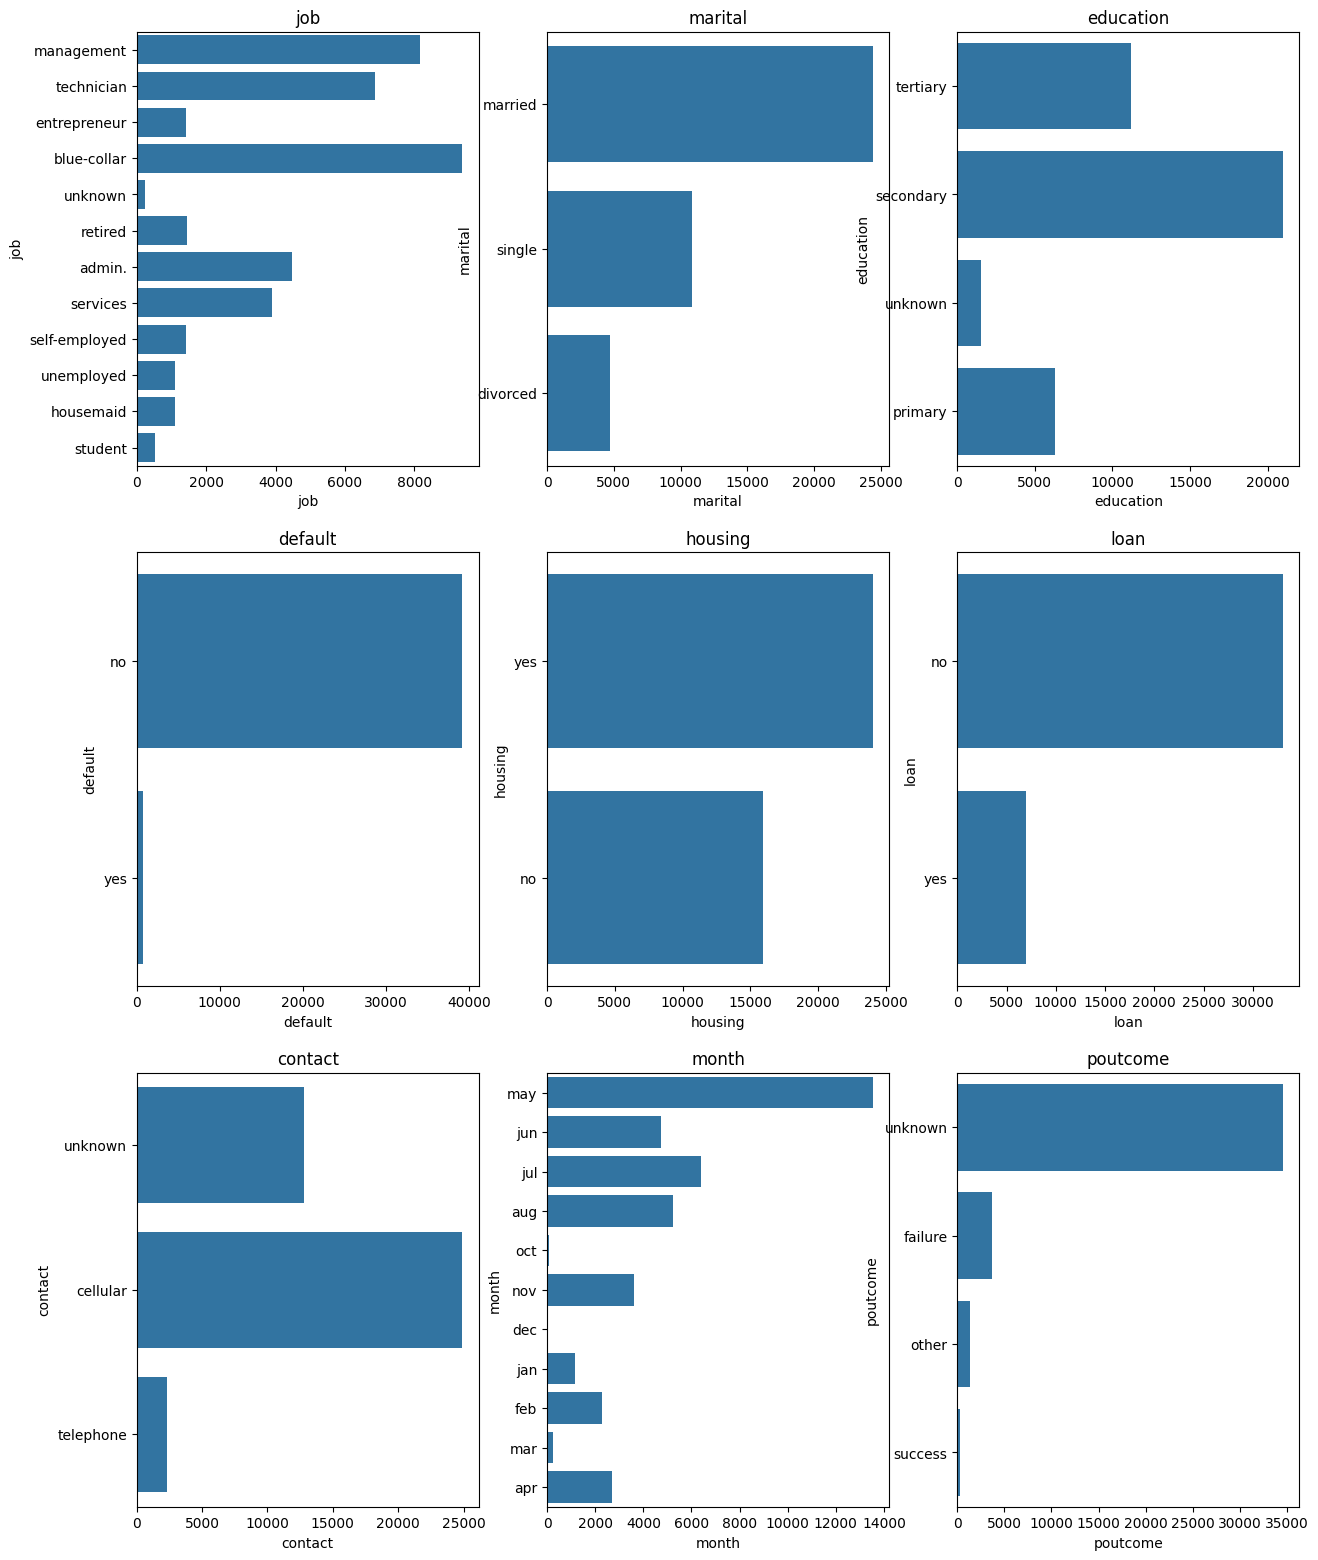

In [24]:
# Check count based on categorical features
plt.figure(figsize=(15,80), facecolor="white")
plot_number=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plot_number)
    sns.countplot(y=categorical_feature, data=df_train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plot_number+=1
plt.show()

**Take-away**

- Client with job type as blue collar, management, and technician records are high in given Dataset
- Client who married are high in records in given Dataset and divorced are less
- Client who's education background is secondary are high in given Dataset
- Default feature seems to be doesn't play an important role as it has high value of no than value of yes, which can be dropped
- Data in month of may is high and less in dec, oct, and mar. No data in sep

**6. Relationship between Categorical Features and Label**

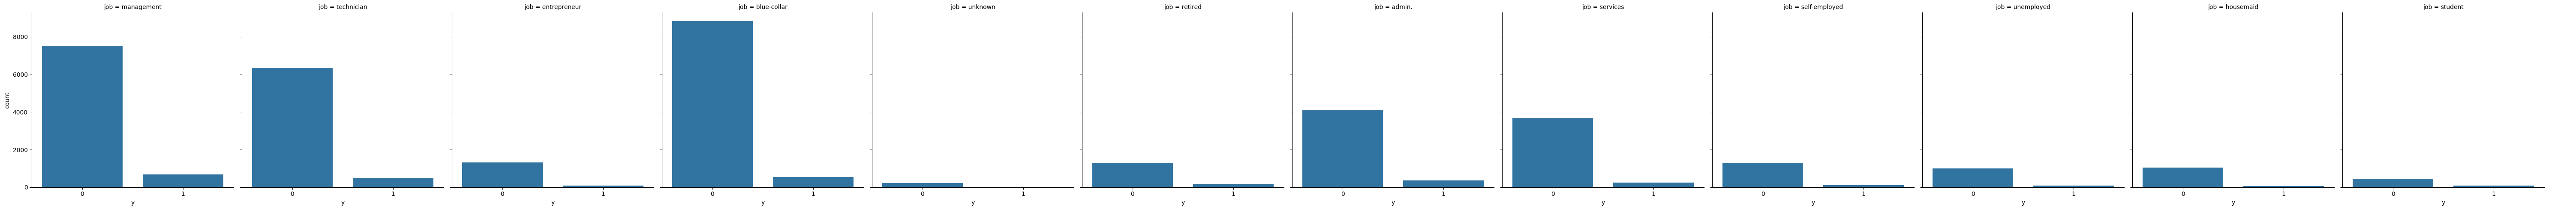

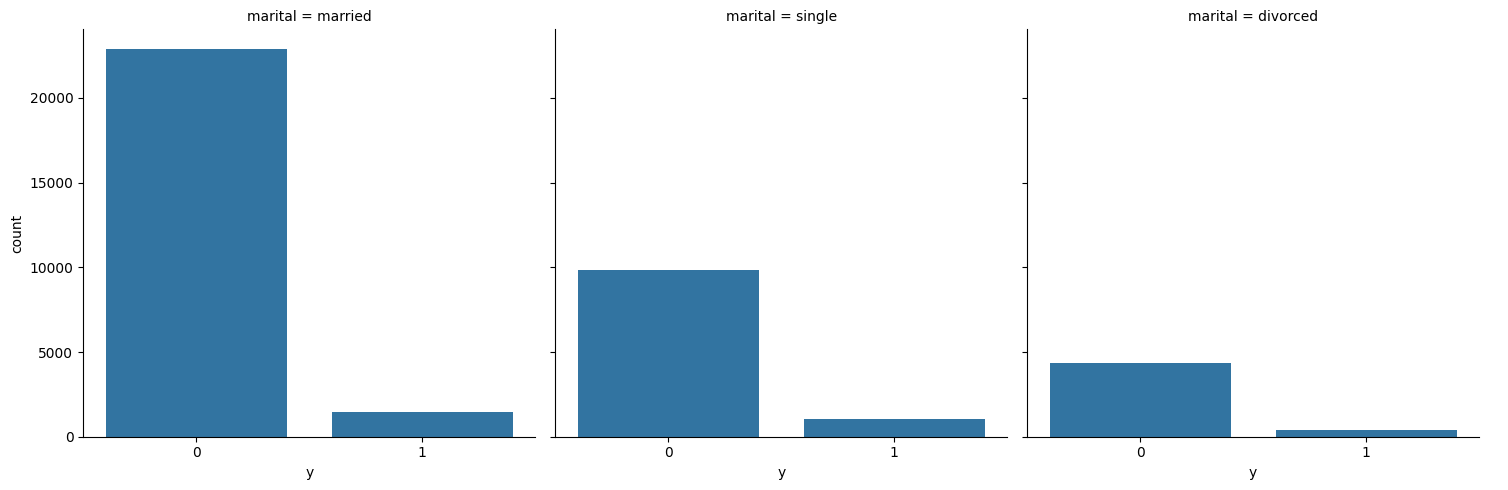

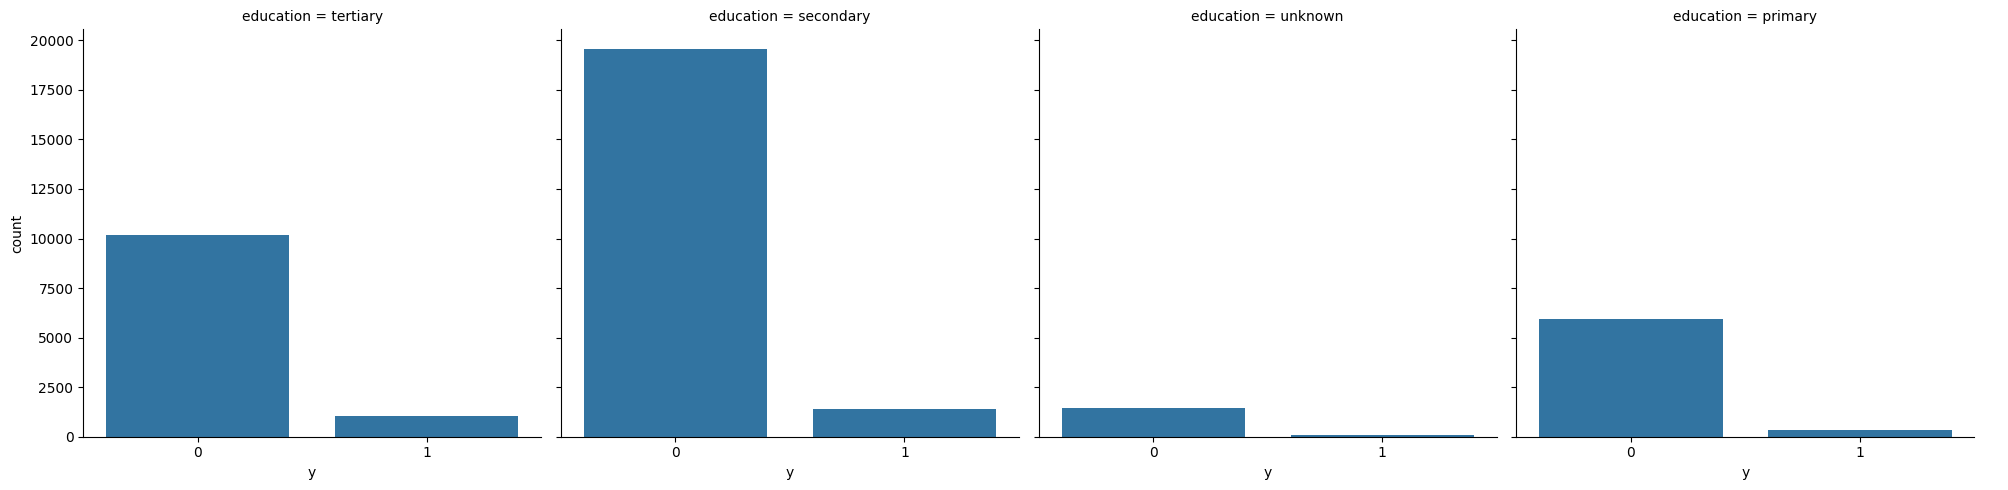

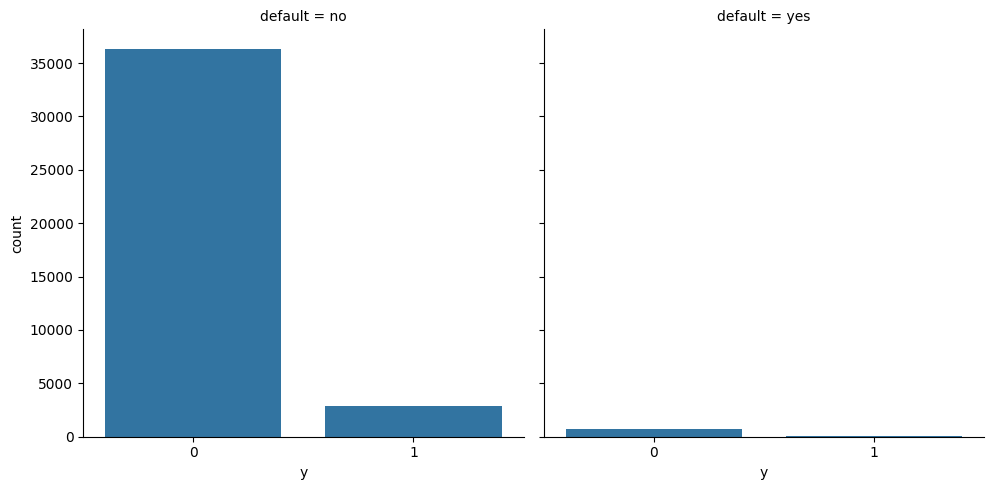

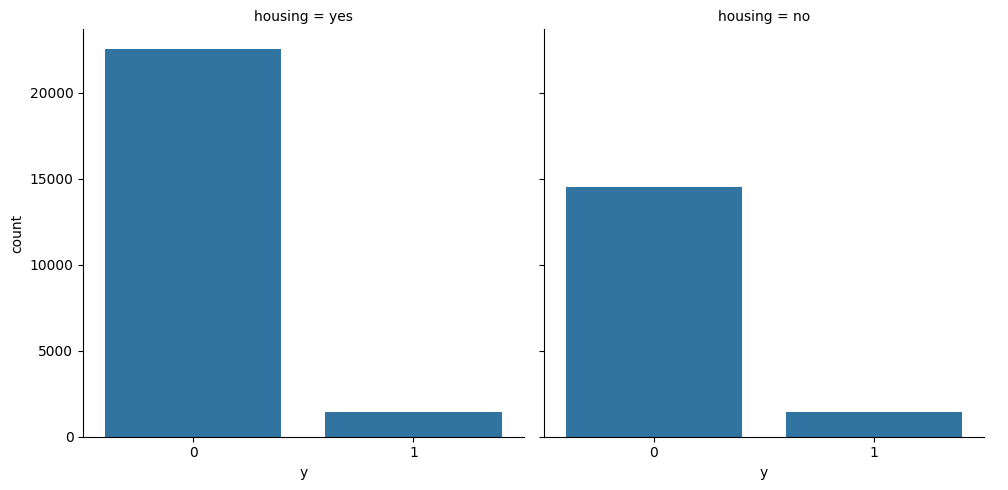

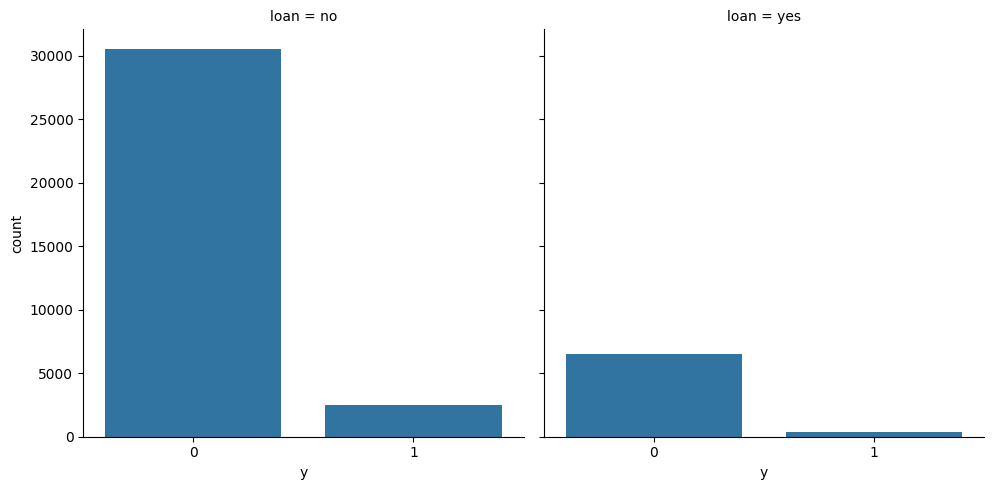

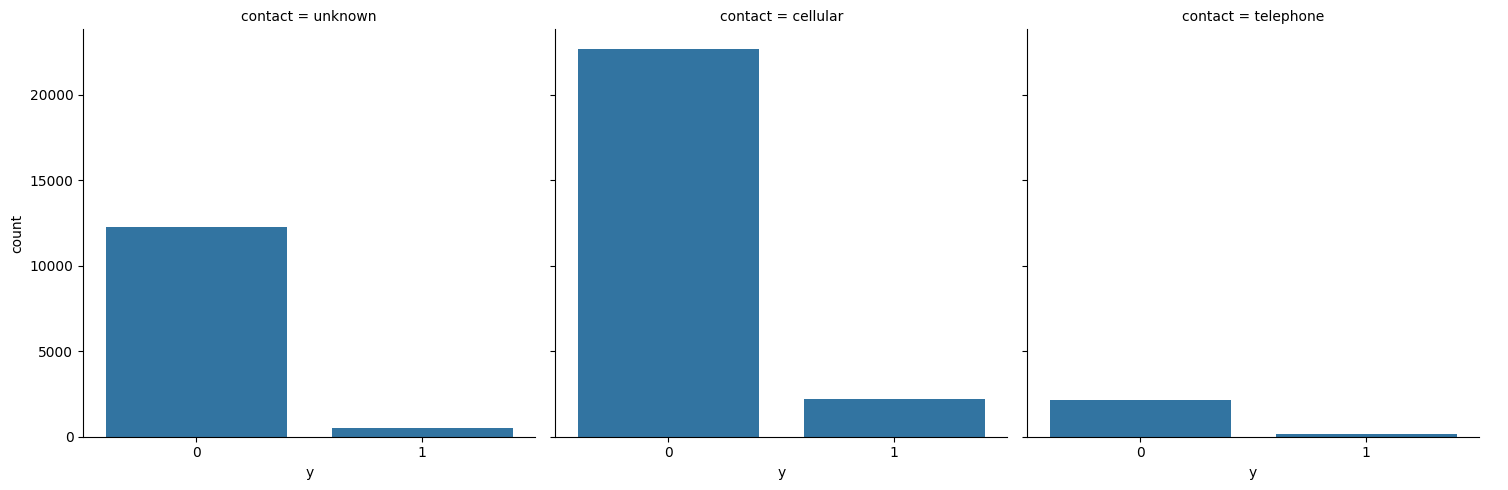

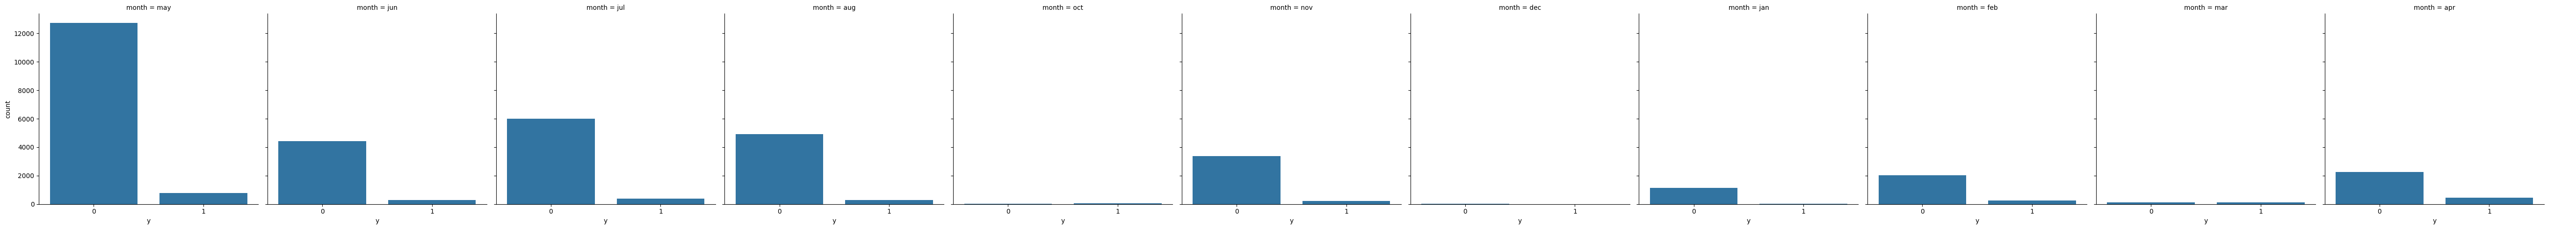

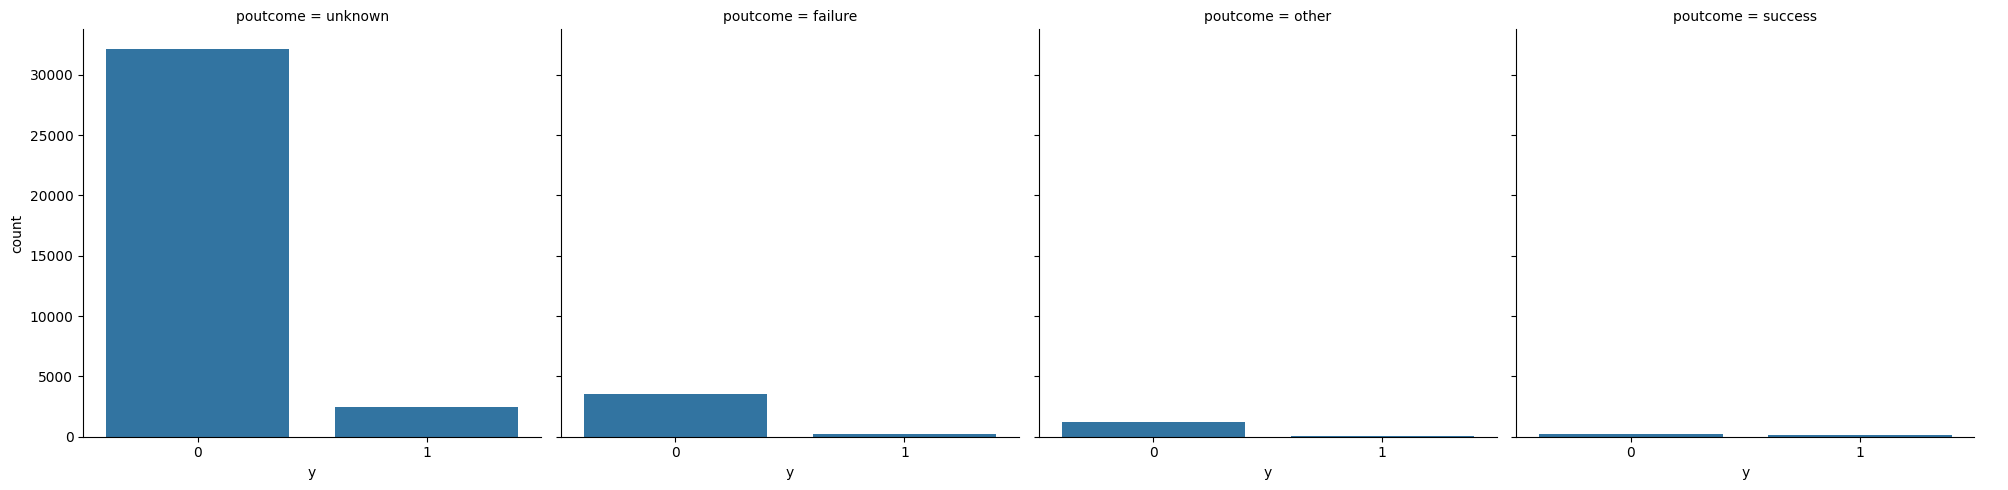

In [ ]:
# Check target label split over categorical features
# Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x="y", col=categorical_feature, kind="count", data=df_train)
plt.show()

In [27]:
# Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df_train.groupby(["y", categorical_feature]).size())

y  job          
0  admin.           4132
   blue-collar      8848
   entrepreneur     1317
   housemaid        1034
   management       7490
   retired          1286
   self-employed    1302
   services         3672
   student           442
   technician       6355
   unemployed       1008
   unknown           218
1  admin.            351
   blue-collar       535
   entrepreneur       88
   housemaid          53
   management        676
   retired           151
   self-employed     112
   services          238
   student            82
   technician        497
   unemployed         96
   unknown            17
dtype: int64
y  marital 
0  divorced     4334
   married     22908
   single       9862
1  divorced      391
   married      1478
   single       1027
dtype: int64
y  education
0  primary       5917
   secondary    19575
   tertiary     10177
   unknown       1435
1  primary        353
   secondary     1418
   tertiary      1029
   unknown         96
dtype: int64
y  default
0  no 

**Take-away**

- Retired client has high interest on deposit
- Client who has housing loan seems to be not interested on deposit
- In may, records are high but client interests are very low

**7. Explore the Numerical Features**

In [28]:
# List of Numerical Variables
numerical_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes != "O") & (feature not in ["y"]))]
print("Number of numerical variables: ", len(numerical_features))

# Visualize the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**Take-away**

- There are 7 numerical features in given Dataset

**8. Find Discrete Numerical Features**

In [29]:
discrete_feature = [feature for feature in numerical_features if len(df_train[feature].unique()) < 25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Take-away**

- There are no Discrete Variables in given Dataset

**9. Relation between Discrete Numerical Features and Label**

- N/A

**10. Find Continuous Numerical Features**

In [30]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous Feature Count {}".format(len(continuous_features)))

Continuous Feature Count 7


**Take-away**

- There are 7 Continuous Variables in given Dataset

**11. Distribution of Continuous Numerical Features**

C:\Users\PC-MSI\AppData\Local\Temp\ipykernel_23472\2750904807.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[continuous_feature])
C:\Users\PC-MSI\AppData\Local\Temp\ipykernel_23472\2750904807.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[continuous_feature])
C:\Users

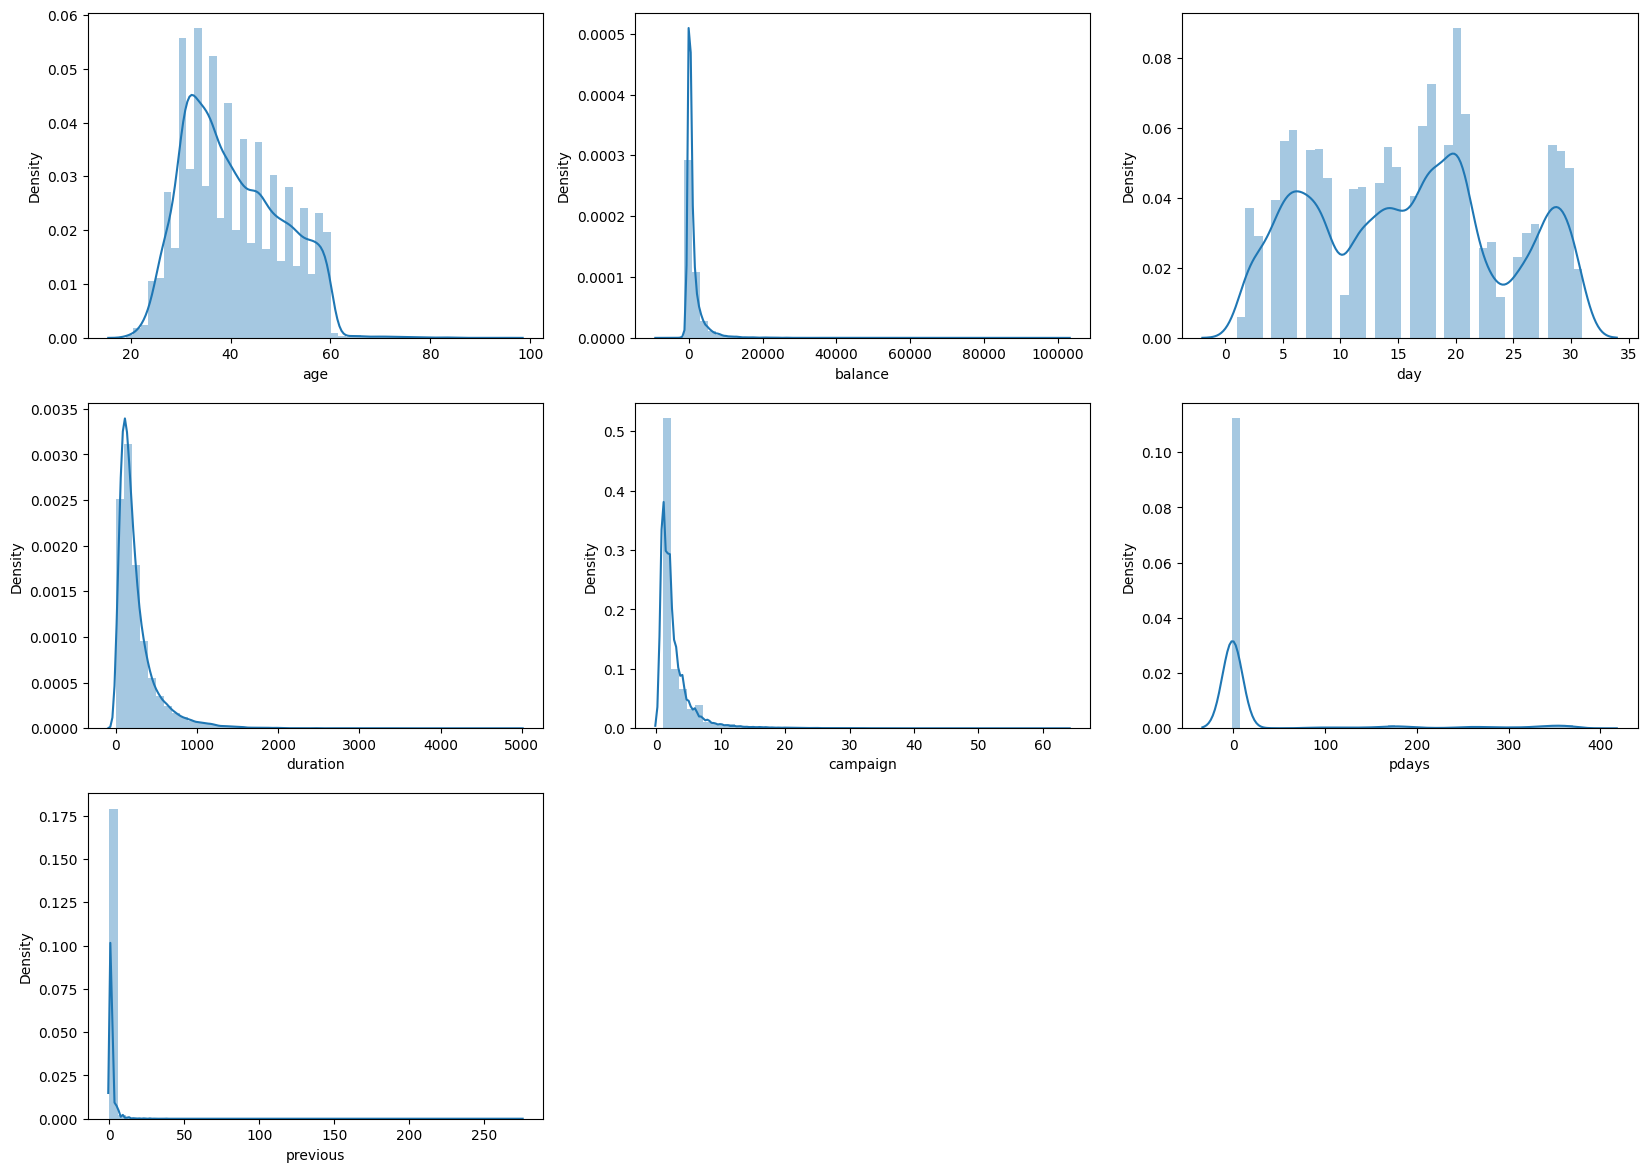

In [33]:
# Plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor="white")
plot_number=1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plot_number)
    sns.distplot(df_train[continuous_feature])
    plt.xlabel(continuous_feature)
    plot_number+=1
plt.show()

**Take-away**

- Age feature distributed normally, there are outlier but it's an exception because in the real world context it's possible
- Balance, duration, campaign, pdays, and previous heavily skewed towards left and seems to be have some outliers

**12. Relation between Continuous Numerical Features and Label**

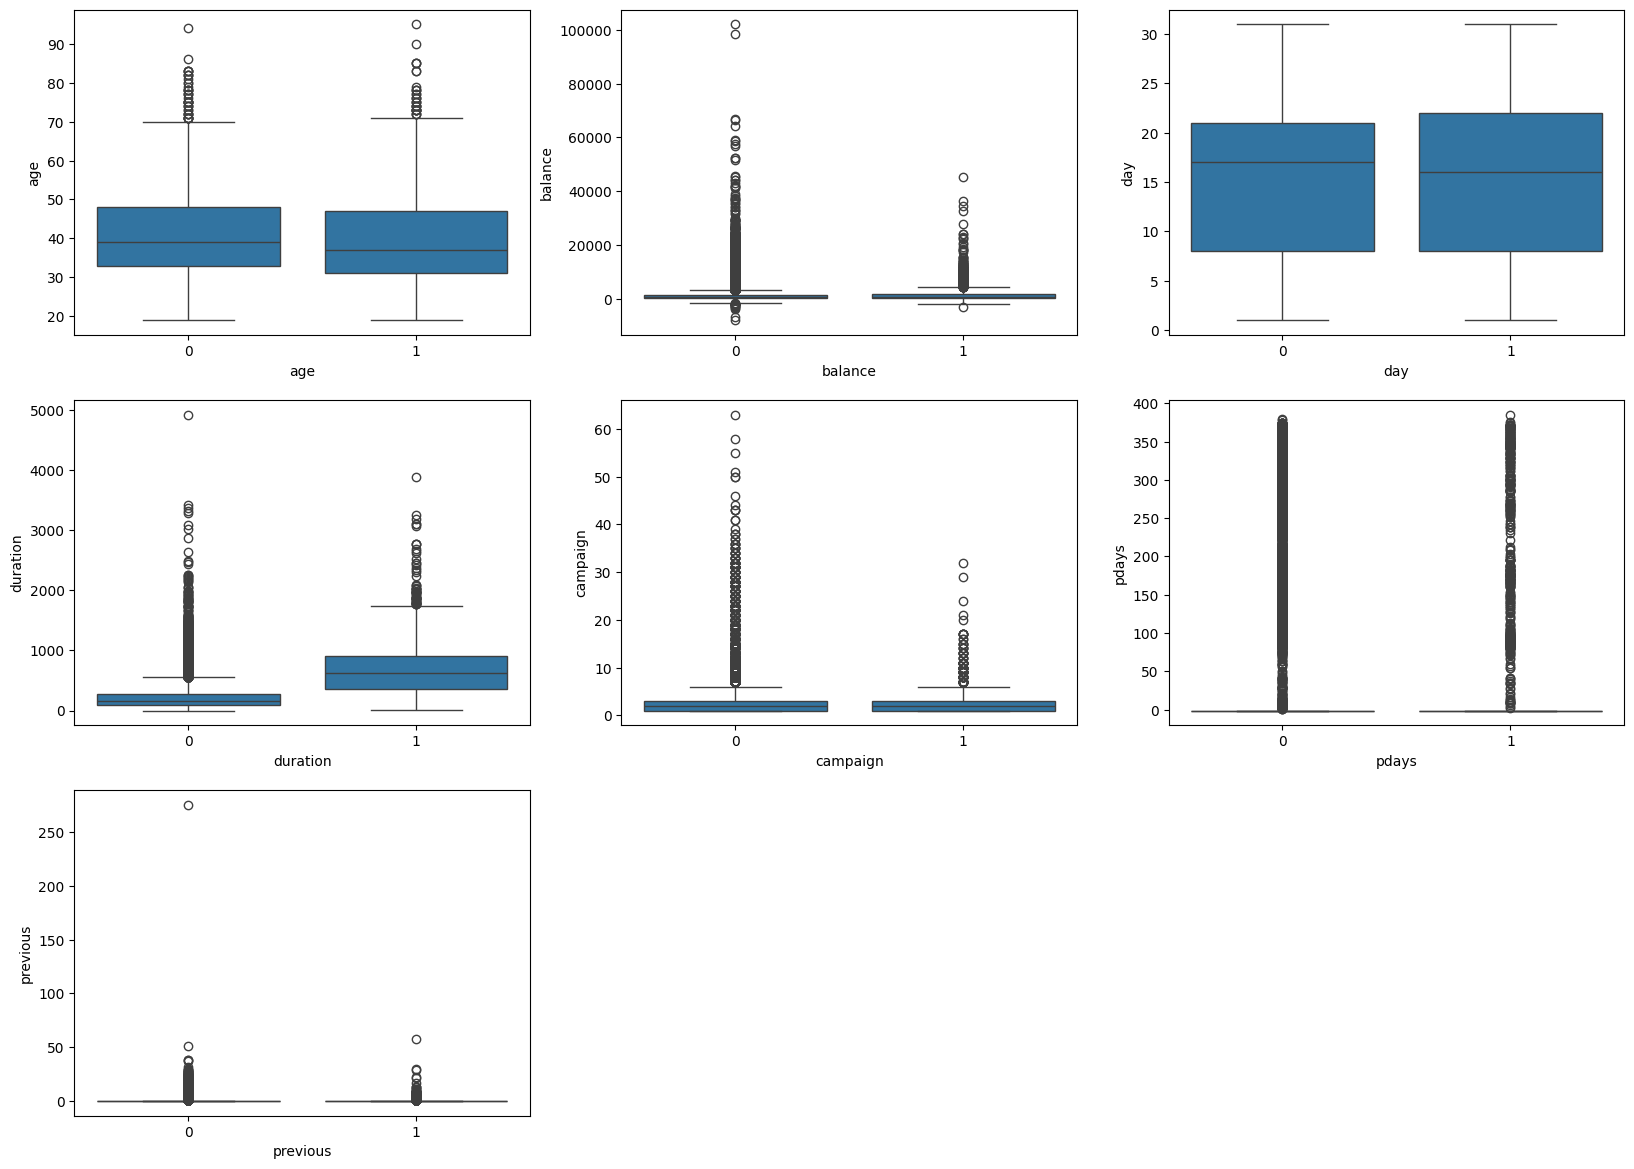

In [34]:
# Boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor="white")
plot_number=1
for feature in continuous_features:
    ax = plt.subplot(12,3,plot_number)
    sns.boxplot(x="y", y=df_train[feature], data=df_train)
    plt.xlabel(feature)
    plot_number+=1
plt.show()

**Take-away**

- Client shows interest on deposit, if they had longer duration deposit

**13. Find Outliers in Numerical Features**

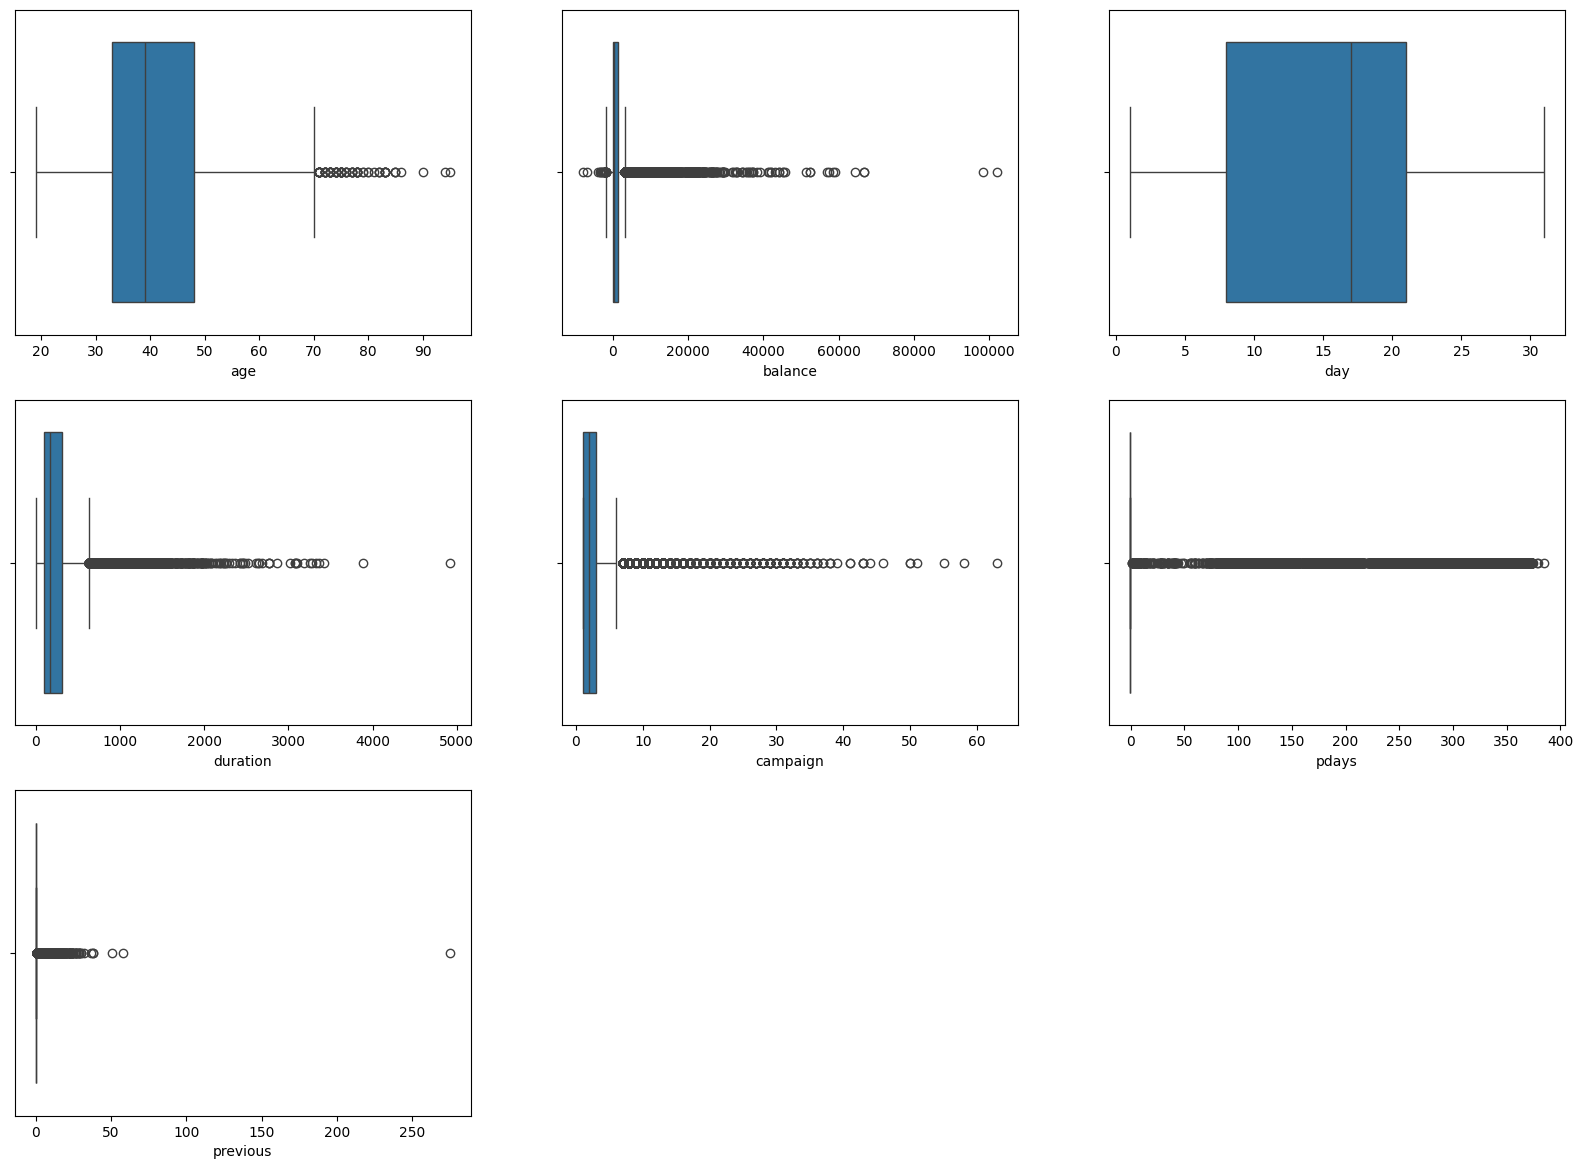

In [37]:
# Boxplot on Numerical Features to Find Outliers
plt.figure(figsize=(20,60), facecolor="white")
plot_number=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plot_number)
    sns.boxplot(x=df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plot_number+=1
plt.show()

**Take-away**

- Age, balance, duration, campaign, pdays, and previous has some outliers. Although on some variable it's normal/possible in real world context

**14. Explore the Correlation between Numerical Features**

<Axes: >

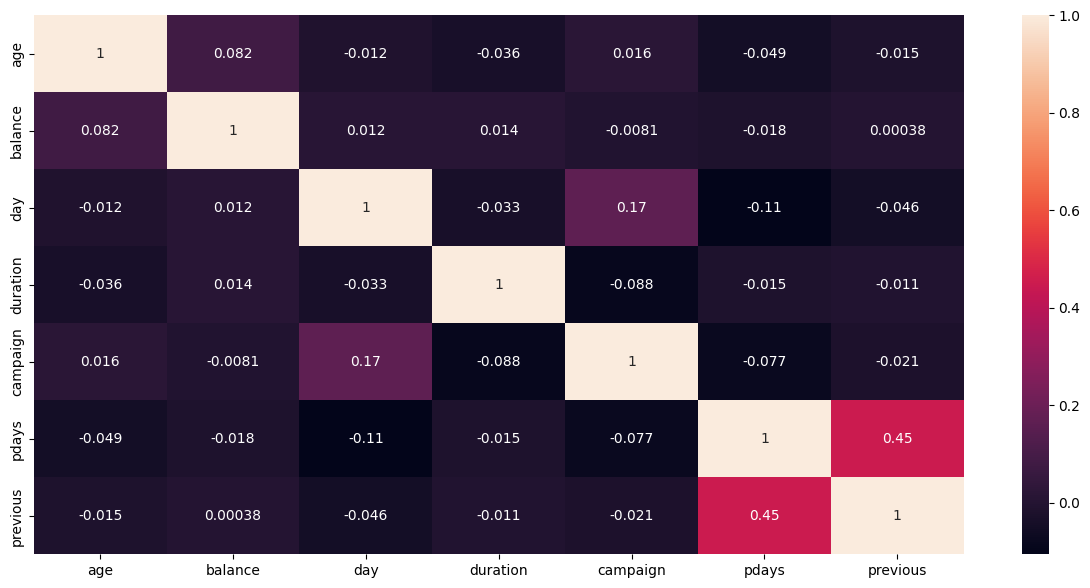

In [39]:
# Checking for correlation
cor_mat=df_train[numerical_features].corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Take-away**

- There's no feature heavily correlated with other features
- pdays feature have moderate correlation with previous feature

**15. Check the Dataset is balanced or not based on target values in classifications**

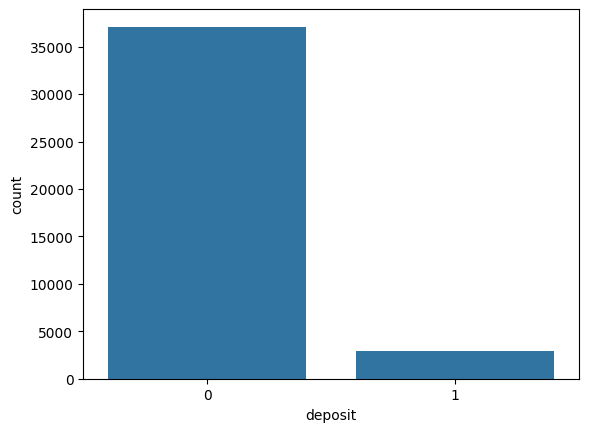

In [40]:
# Total deposit success and fail count
sns.countplot(x="y", data=df_train)
plt.xlabel("deposit")
plt.show()

In [41]:
df_train["y"].groupby(df_train["y"]).count()

y
0    37104
1     2896
Name: y, dtype: int64

**Take-away**

- There are imbalanced data on given Dataset

## **Feature Engineering**

**Feature Engineering TO-DO List:**
- Drop Unwanted Columns
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scaling
- Remove Outliers

**As per EDA:**
- No Missing Values Found
- No Feature Found with One Value
- There are 9 Categorical Features
- Default Features doesn't Play an Important Role
- There are Outliers Found (Age, Balance, Duration, Campaign, pdays, and Previous)

In [84]:
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()

In [54]:
df_train_fe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [55]:
df_train_fe.shape

(40000, 17)

In [56]:
# Check Importance of Default Feature
df_train_fe.groupby(["y", "default"]).size()

y  default
0  no         36344
   yes          760
1  no          2847
   yes           49
dtype: int64

In [85]:
# Drop Default Feature, as it doesn't play an important role
df_train_fe.drop('default', axis=1, inplace=True)
df_test_fe.drop('default', axis=1, inplace=True)

In [58]:
# Check Importance of pdays Feature
df_train_fe.groupby(["y", "pdays"]).size()

y  pdays
0  -1       32152
    1           3
    2          34
    4           1
    5          11
            ...  
1   371         4
    372         1
    374         1
    375         1
    385         1
Length: 568, dtype: int64

In [86]:
# Drop pdays Feature, as it has -1 value for around 40%
df_train_fe.drop('pdays', axis=1, inplace=True)
df_test_fe.drop('pdays', axis=1, inplace=True)

In [60]:
# Remove outliers on Age Feature
df_train_fe.groupby('age', sort=True)['age'].count()
# These can be ignored and values lies in between 19 to 95, it's possible in real world context

age
19     12
20     22
21     39
22     71
23    149
     ... 
85      3
86      1
90      1
94      1
95      1
Name: age, Length: 70, dtype: int64

In [66]:
# Remove outliers on Balance Feature
df_train_fe.groupby(['y', 'balance'], sort=True)['balance'].count()
# These outlier should not be removed as balance goes high, it's possible in real world context

y  balance
0  -8019      1
   -6847      1
   -4057      1
   -3372      1
   -3313      1
             ..
1   27624     1
    32685     1
    34646     1
    36252     1
    45248     1
Name: balance, Length: 8391, dtype: int64

In [67]:
# Remove outliers on Duration Feature
df_train_fe.groupby(['y', 'duration'], sort=True)['duration'].count()
# These outlier should not be removed as duration goes high, it's possible in real world context

y  duration
0  0           3
   1           1
   2           3
   3           4
   4           5
              ..
1  3094        1
   3102        1
   3183        1
   3253        1
   3881        1
Name: duration, Length: 2505, dtype: int64

In [73]:
# Remove outliers on Campaign Feature
df_train_fe.groupby(['y', 'campaign'], sort=True)['campaign'].count()

y  campaign
0  1           13454
   2           10393
   3            4618
   4            3075
   5            1547
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [74]:
df_train_fe2 = df_train_fe[df_train_fe['campaign'] < 33]

In [75]:
# Check Campaign Feature
df_train_fe2.groupby(['y', 'campaign'], sort=True)['campaign'].count()

y  campaign
0  1           13454
   2           10393
   3            4618
   4            3075
   5            1547
   6            1160
   7             664
   8             501
   9             299
   10            250
   11            184
   12            150
   13            125
   14             89
   15             79
   16             76
   17             63
   18             51
   19             44
   20             42
   21             34
   22             23
   23             22
   24             19
   25             22
   26             13
   27             10
   28             16
   29             15
   30              8
   31             12
   32              8
1  1            1264
   2             760
   3             352
   4             222
   5              95
   6              68
   7              35
   8              25
   9              19
   10             12
   11             13
   12              4
   13              6
   14              4
   15              4
 

In [76]:
# Remove outliers on Previous Feature
df_train_fe2.groupby(['y', 'previous'], sort=True)['previous'].count()

y  previous
0  0           32114
   1            1765
   2            1310
   3             631
   4             415
   5             248
   6             130
   7             113
   8              68
   9              56
   10             32
   11             35
   12             26
   13             22
   14             11
   15             18
   16              8
   17              8
   18              6
   19              6
   20              5
   21              3
   22              4
   23              6
   24              5
   25              4
   26              1
   27              5
   28              1
   29              3
   30              1
   32              1
   37              1
   38              2
   51              1
   275             1
1  0            2455
   1             171
   2             108
   3              59
   4              32
   5              18
   6              21
   7              12
   8               6
   9               2
   10              1
 

In [83]:
df_train_fe3 = df_train_fe2[df_train_fe2['previous'] < 31]

In [87]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    df_train_fe3 = pd.concat([df_train_fe3.drop(col, axis=1),pd.get_dummies(df_train_fe3[col], prefix=col, prefix_sep="_", drop_first=True, dummy_na=False)], axis=1)
    df_test_fe = pd.concat([df_test_fe.drop(col, axis=1),pd.get_dummies(df_test_fe[col], prefix=col, prefix_sep="_", drop_first=True, dummy_na=False)], axis=1)

bool_columns = ['housing', 'loan']
for col in bool_columns:
    df_train_fe3[col+'_new']=df_train_fe3[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_test_fe[col+'_new']=df_test_fe[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_train_fe3.drop(col, axis=1, inplace=True)
    df_test_fe.drop(col, axis=1, inplace=True)

In [88]:
df_train_fe3.head()

,age,balance,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,58,2143,5,261,1,0,0,False,False,False,...,False,False,True,False,False,False,False,True,1,0
1,44,29,5,151,1,0,0,False,False,False,...,False,False,True,False,False,False,False,True,1,0
2,33,2,5,76,1,0,0,False,True,False,...,False,False,True,False,False,False,False,True,1,1
3,47,1506,5,92,1,0,0,True,False,False,...,False,False,True,False,False,False,False,True,1,0
4,33,1,5,198,1,0,0,False,False,False,...,False,False,True,False,False,False,False,True,0,0


In [89]:
df_test_fe.head()

,id,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,40100,57,718,3,170,1,0,False,False,False,...,False,False,False,False,False,False,False,True,0,0
1,40101,50,268,3,74,2,2,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,40102,46,4367,3,65,1,1,False,False,False,...,False,False,False,False,False,False,False,False,1,0
3,40103,56,3554,3,151,1,0,False,False,False,...,False,False,False,False,False,False,False,True,0,0
4,40104,32,785,3,273,1,0,False,False,False,...,False,False,False,False,False,False,False,True,0,0


## **Split Data and Deal with Imbalanced Dataset**

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate Features and Label
X = df_train_fe3.drop('y', axis=1)
y = df_train_fe3['y']

# Balanced Dataset
X_imb,y_imb = SMOTE().fit_resample(X,y)

# Split Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size = 0.25, random_state = 42)

## **Model Selection**

In [96]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

model_score_rf = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=10)
model_score_xg = cross_val_score(estimator=XGBClassifier(), X=X_train, y=y_train, cv=10)

print(model_score_rf, "Mean: ", model_score_rf.mean())
print(model_score_xg, "Mean: ", model_score_xg.mean())

[0.96438208 0.96204353 0.96240331 0.96204353 0.95682677 0.96510164
 0.9625832  0.96708041 0.96330275 0.95916532] Mean:  0.9624932541824067
[0.96186364 0.96204353 0.96492175 0.95718654 0.96006476 0.96312286
 0.96312286 0.96474186 0.96114409 0.96042454] Mean:  0.961863644540385


In [97]:
# Create Param Dict
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [98]:
# Perform Grid Search CV
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

c:\Users\PC-MSI\anaconda3\envs\aiphm\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC-MSI\anaconda3\envs\aiphm\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC-MSI\anaconda3\envs\aiphm\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\PC-MSI\anaconda3\envs\aiphm\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

In [99]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9060262637164957,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 130}},
 {'model': 'XGBClassifier',
  'best_score': 0.963140852671344,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]

## **Model Build: XGBoost**

In [100]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_dept=10,n_estimators=200)

In [101]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dept=10, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [102]:
model_xgb.score(X_test,y_test)

0.9598488936859148

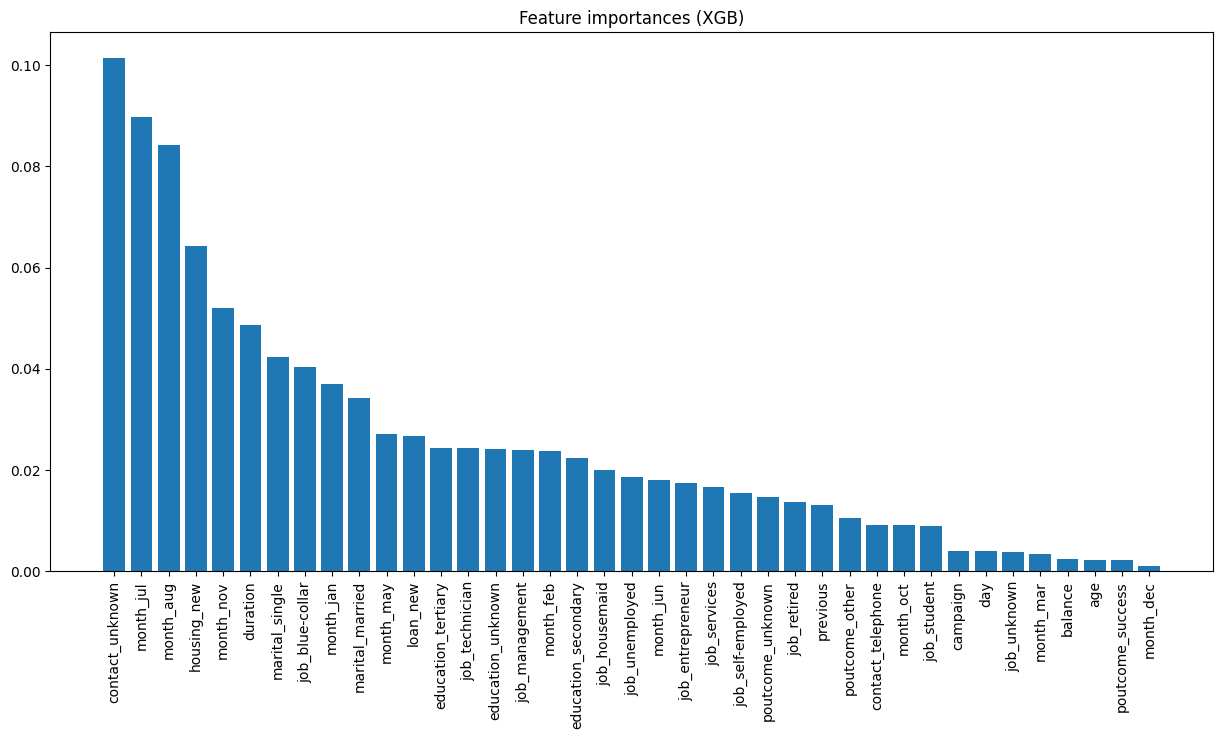

In [103]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [104]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[8927,  401],
       [ 343, 8859]], dtype=int64)

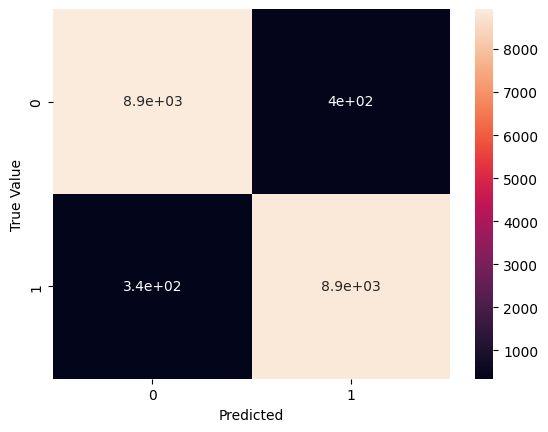

In [105]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

## **Model Build: Random Forest**

In [110]:
model_rf = RandomForestClassifier(criterion='entropy',max_depth=3,max_features='log2',n_estimators=130)

In [111]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=130)

In [112]:
model_rf.score(X_test,y_test)

0.9061521856449002

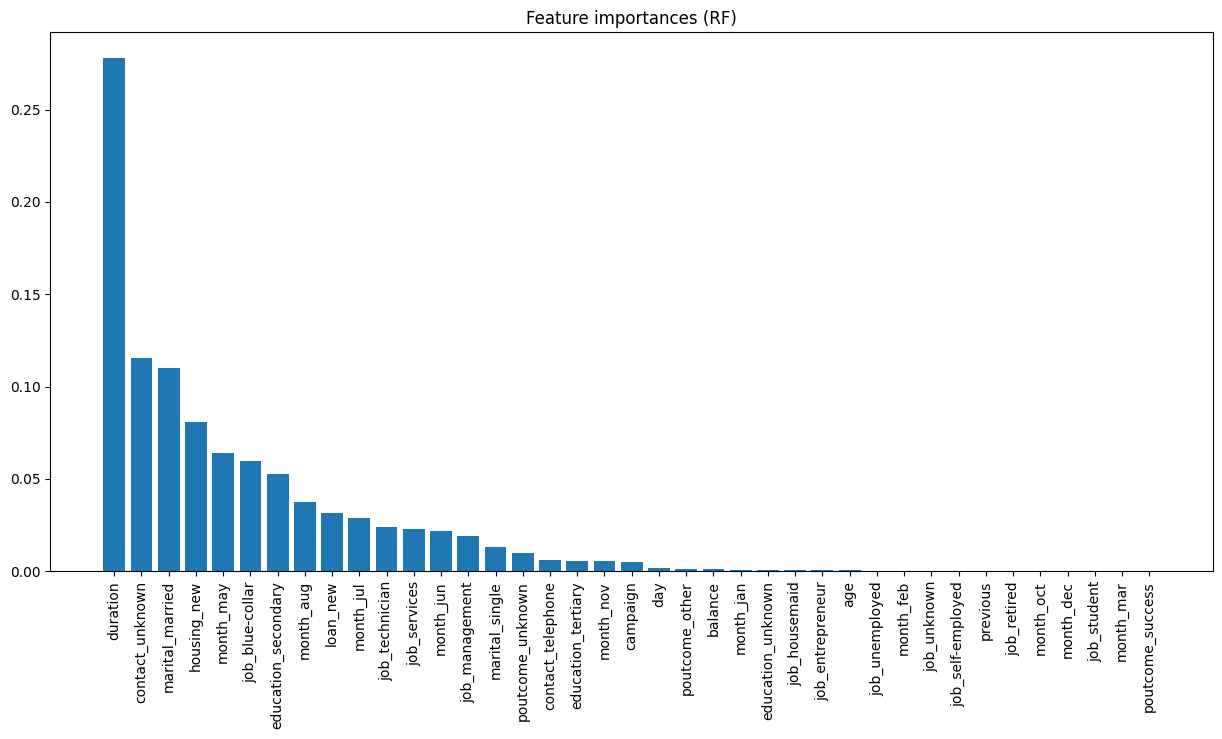

In [113]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rf_feature_importances))
plt.bar(x_pos, rf_feature_importances['score'])
plt.xticks(x_pos, rf_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (RF)')

plt.show()

In [114]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_rf.predict(X_test))
cm

array([[8368,  960],
       [ 779, 8423]], dtype=int64)

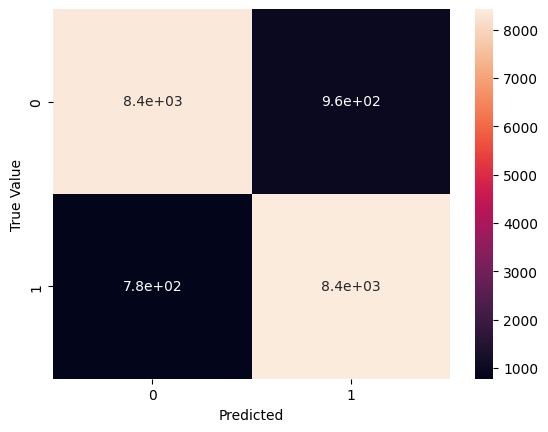

In [115]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

## **Predict on Test Set**

In [107]:
test_pred = model_xgb.predict(df_test_fe.drop(["id", "month_sep"], axis=1))

In [108]:
submission_df = pd.DataFrame({'id': df_test_fe['id'], 'y': test_pred})
submission_df.to_csv("[LATE] Ichsan_Hibatullah-programming_1-ADIIP2025A.csv", index=False)

In [109]:
submission_df['y'].value_counts()

y
0    3318
1    1893
Name: count, dtype: int64

In [119]:
test_pred_rf = model_rf.predict(df_test_fe.drop(["id", "month_sep"], axis=1))

In [122]:
submission_df_rf = pd.DataFrame({'id': df_test_fe['id'], 'y': test_pred_rf})
submission_df_rf.to_csv("[LATE] Ichsan_Hibatullah-programming_1-ADIIP2025A.csv", index=False)

In [123]:
submission_df_rf['y'].value_counts()

y
0    3075
1    2136
Name: count, dtype: int64